In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

C:\Users\harsh\AppData\Local\Temp\ipykernel_9452\328324305.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import svm

In [20]:
df=pd.read_csv("housing.csv")

In [21]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [23]:
df.dropna(inplace=True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [63]:
from sklearn.model_selection import train_test_split
X=df.drop(['median_house_value'],axis=1)
y=df['median_house_value']

In [64]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [72]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [82]:
X_train ,X_test ,y_train ,y_test = train_test_split(X,y, test_size=0.2)

In [83]:
train_data=X_train.join(y_train)

In [84]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
2207,-119.86,36.81,4.0,4530.0,1070.0,1804.0,837.0,3.3942,INLAND,72100.0
2512,-122.20,39.75,18.0,2603.0,576.0,1616.0,588.0,2.0192,INLAND,63700.0
16024,-122.46,37.73,52.0,2857.0,469.0,1431.0,496.0,5.2088,NEAR BAY,344200.0
9744,-121.68,36.72,12.0,19234.0,4492.0,12153.0,4372.0,3.2652,<1H OCEAN,152800.0
672,-122.16,37.70,36.0,1719.0,303.0,836.0,311.0,4.4375,NEAR BAY,193500.0
...,...,...,...,...,...,...,...,...,...,...
15859,-122.39,37.76,52.0,1877.0,427.0,712.0,398.0,3.9722,NEAR BAY,290900.0
17591,-121.90,37.30,39.0,3627.0,666.0,1531.0,635.0,4.5370,<1H OCEAN,345900.0
18670,-121.88,36.98,21.0,4117.0,752.0,2001.0,763.0,4.8953,NEAR OCEAN,289500.0
18085,-122.05,37.31,25.0,4601.0,696.0,2003.0,666.0,8.0727,<1H OCEAN,455500.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

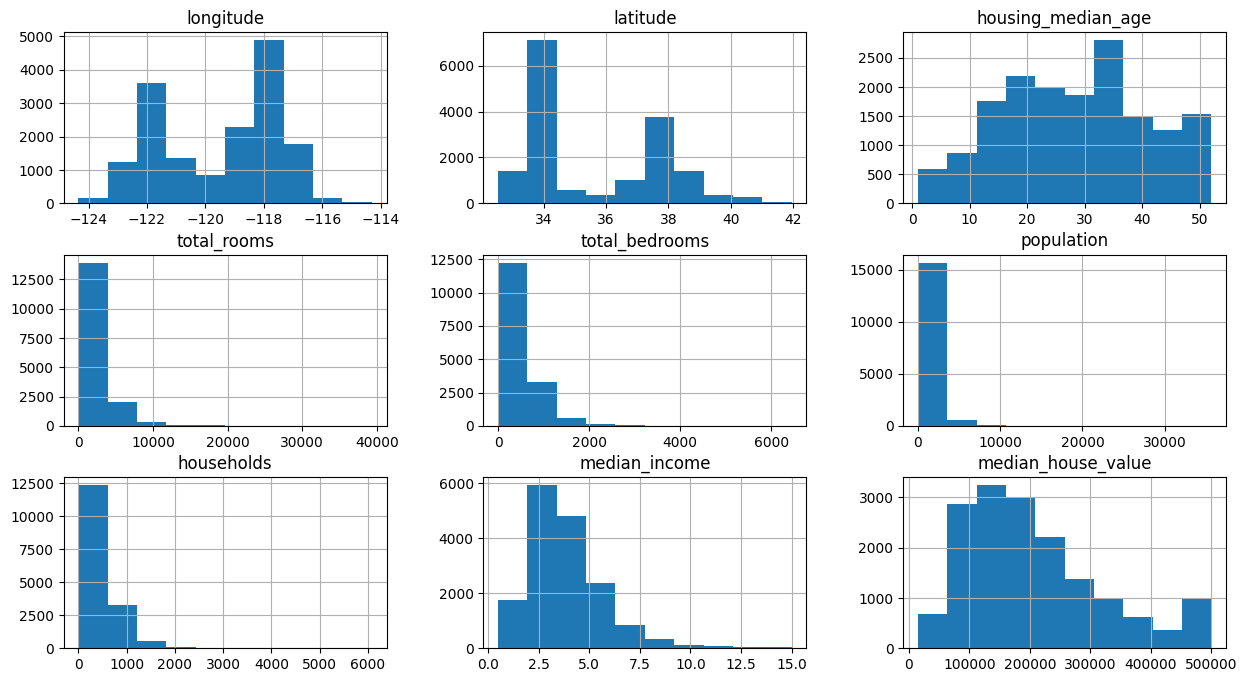

In [85]:
train_data.hist(figsize=(15,8))

In [87]:
train_data.corr(numeric_only=True)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924885,-0.108507,0.050150,0.074918,0.102000,0.060971,-0.019314,-0.049111
latitude,-0.924885,1.000000,0.009674,-0.042060,-0.072900,-0.112122,-0.077170,-0.076707,-0.141136
housing_median_age,-0.108507,0.009674,1.000000,-0.356102,-0.316677,-0.290183,-0.298399,-0.110634,0.115626
total_rooms,0.050150,-0.042060,-0.356102,1.000000,0.929905,0.855764,0.917992,0.190138,0.127503
total_bedrooms,0.074918,-0.072900,-0.316677,0.929905,1.000000,0.877291,0.979182,-0.015851,0.042115
population,0.102000,-0.112122,-0.290183,0.855764,0.877291,1.000000,0.907377,-0.002733,-0.030654
households,0.060971,-0.077170,-0.298399,0.917992,0.979182,0.907377,1.000000,0.005701,0.057732
median_income,-0.019314,-0.076707,-0.110634,0.190138,-0.015851,-0.002733,0.005701,1.000000,0.689963
median_house_value,-0.049111,-0.141136,0.115626,0.127503,0.042115,-0.030654,0.057732,0.689963,1.000000


<Axes: >

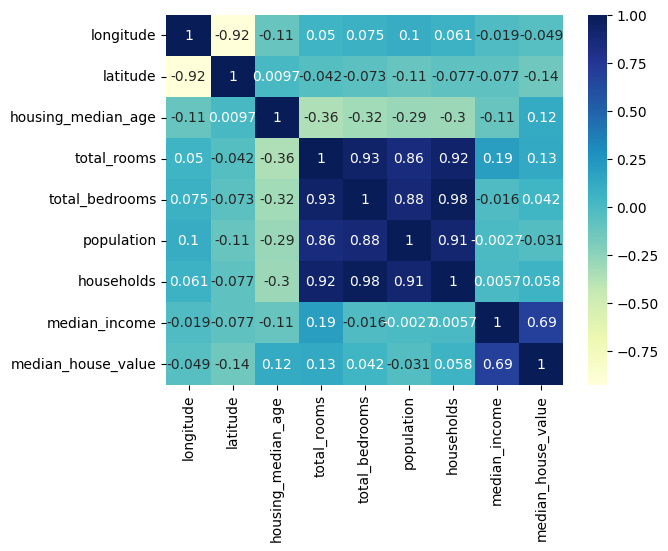

In [88]:
sns.heatmap(train_data.corr(numeric_only=True),annot=True,cmap="YlGnBu")

In [91]:
train_data['total_rooms']= np.log(train_data['total_rooms']+1)
train_data['total_bedrooms']= np.log(train_data['total_bedrooms']+1)
train_data['population']= np.log(train_data['population']+1)
train_data['households']= np.log(train_data['households']+1)


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

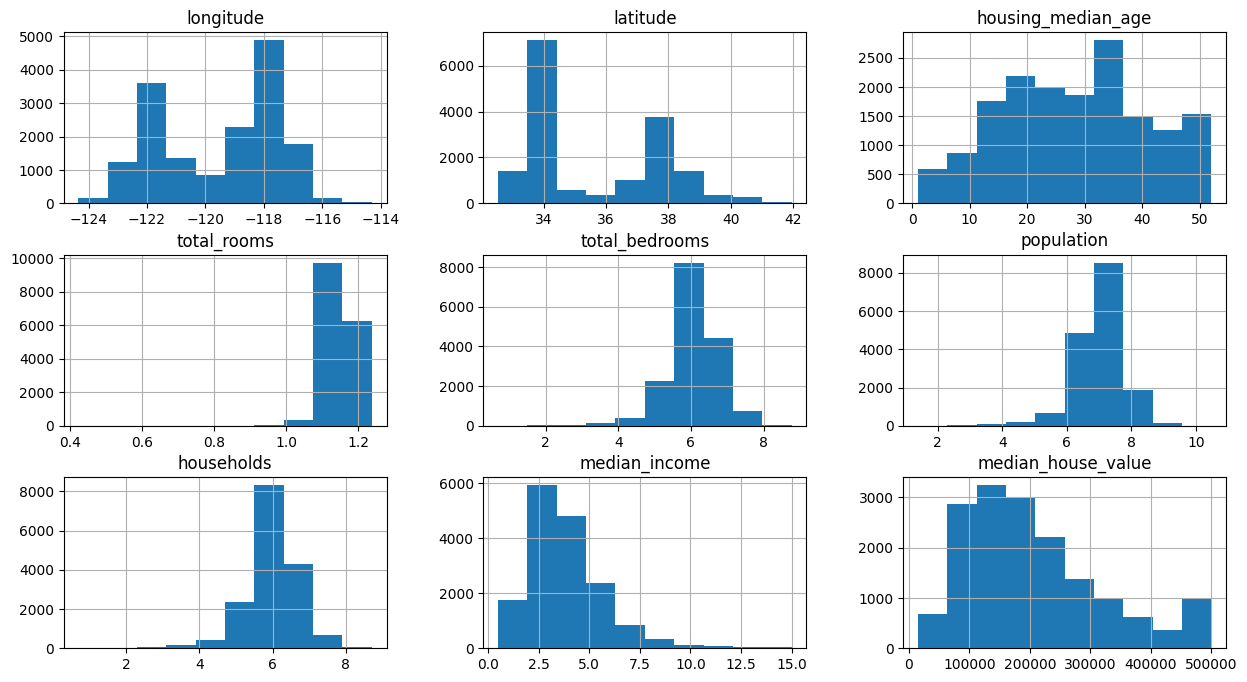

In [92]:
train_data.hist(figsize=(15,8))

In [96]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity,dtype=int)).drop(['ocean_proximity'],axis=1)

<Axes: >

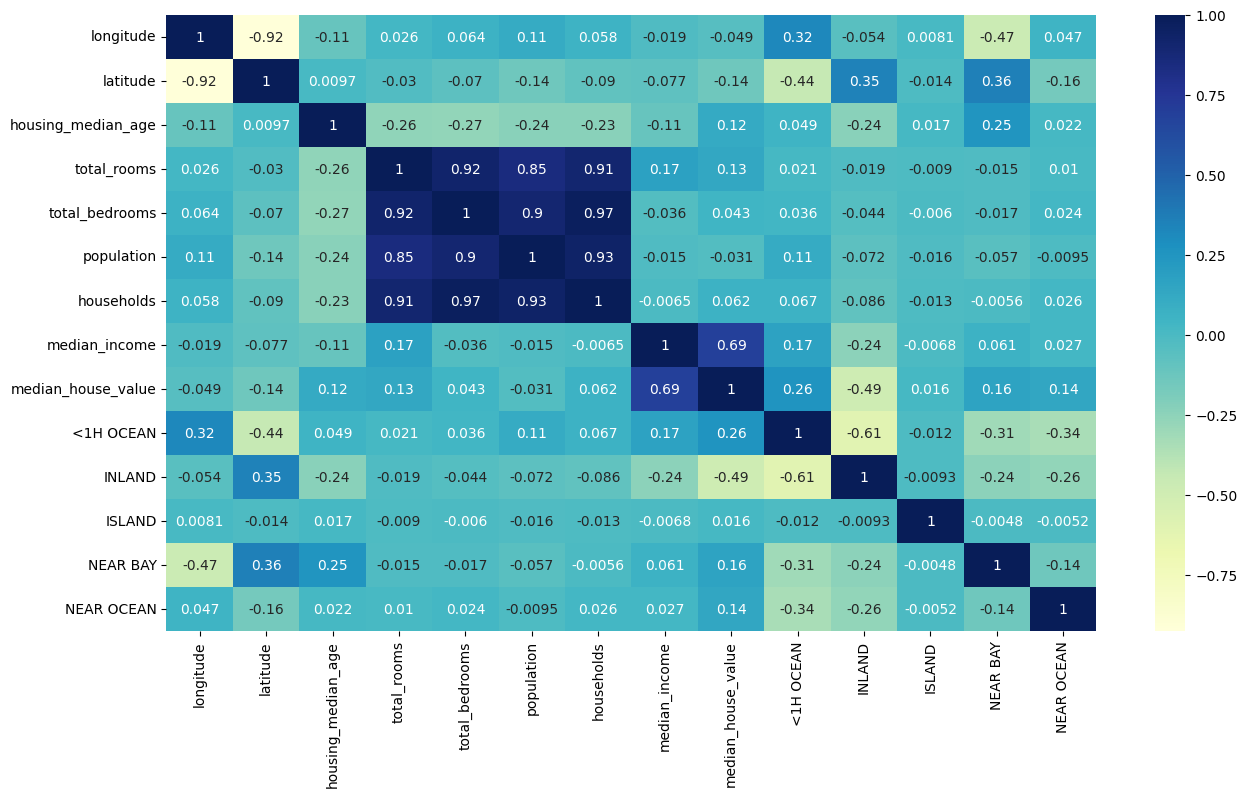

In [99]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True),annot=True,cmap="YlGnBu")

In [102]:
train_data['bedrooms-ratio'] = train_data['total_bedrooms']/train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms']/train_data['households']

<Axes: >

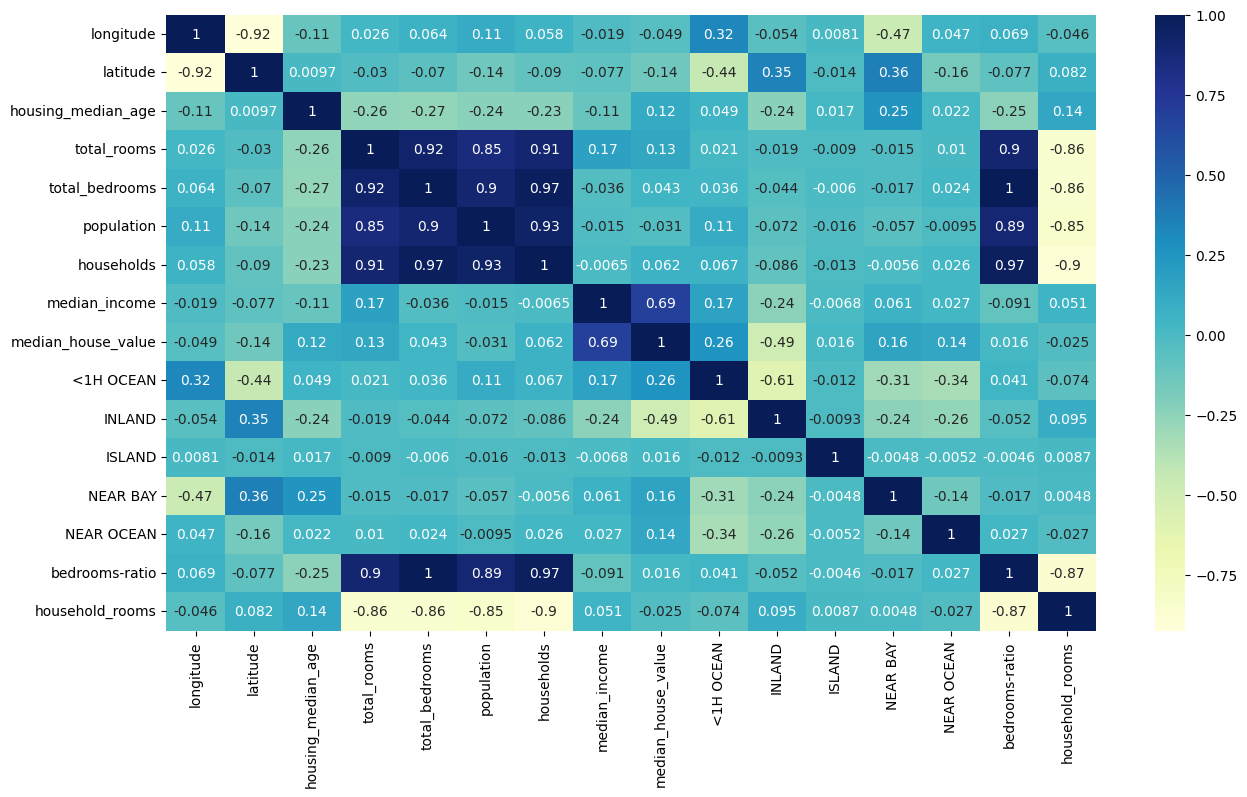

In [103]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True),annot=True,cmap="YlGnBu")

In [108]:
test_data=X_test.join(y_test)
test_data['total_rooms']= np.log(test_data['total_rooms']+1)
test_data['total_bedrooms']= np.log(test_data['total_bedrooms']+1)
test_data['population']= np.log(test_data['population']+1)
test_data['households']= np.log(test_data['households']+1)
test_data= test_data.join(pd.get_dummies(test_data.ocean_proximity,dtype=int)).drop(['ocean_proximity'],axis=1)
test_data['bedrooms-ratio'] = test_data['total_bedrooms']/test_data['total_rooms']
test_data['household_rooms'] = train_data['total_rooms']/test_data['households']
X_train,y_train = train_data.drop(['median_house_value'],axis=1),train_data['median_house_value']
X_test,y_test = test_data.drop(['median_house_value'],axis=1),test_data['median_house_value']


In [107]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
forest.fit(X_train,y_train)

RandomForestRegressor()

In [109]:
forest.score(X_test,y_test)

0.4797587526357575